figures/Figure02.jpg


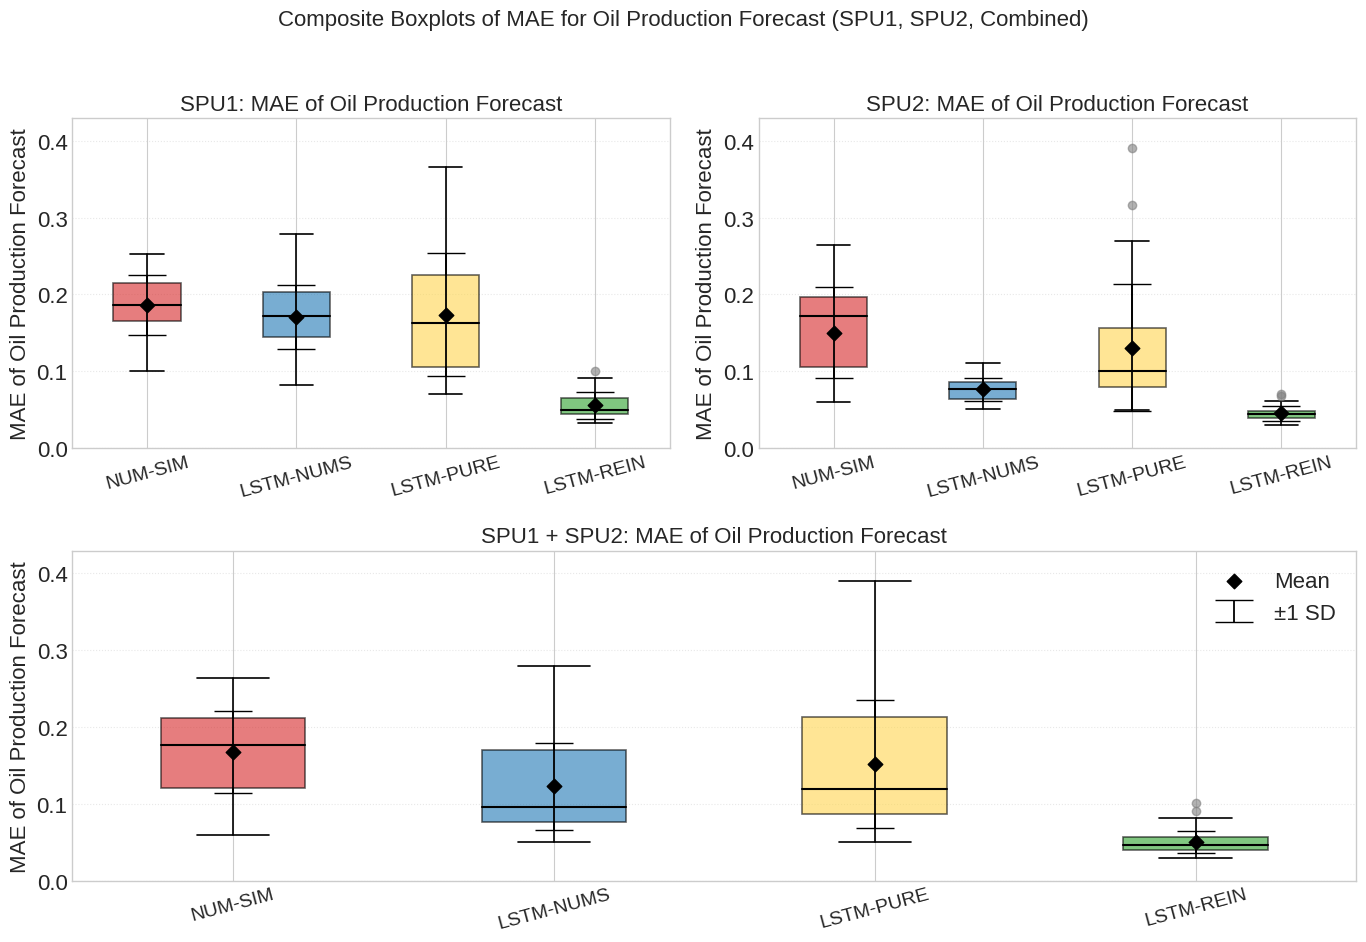

In [1]:

# -*- coding: utf-8 -*-
"""
Composite boxplots of MAE for oil production forecast (SPU1, SPU2, Combined)
- Robust reading: skip the 5-line header and set explicit column names
- Shared Y-axis across panels for better comparability
- Means: black diamond; ±1 SD: error bars
- Labels/titles in English
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from io import StringIO

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import PercentFormatter


# ---- Raw data with multi-line header ----
raw_text = """SPU,DATE,MAE
NUM-SIM,MAE
LSTM-NUMS,MAE
LSTM-PURE,MAE
LSTM-REIN
SPU1,2020/02,0.232,0.279,0.271,0.101
SPU1,2020/03,0.232,0.219,0.218,0.074
SPU1,2020/04,0.252,0.222,0.304,0.091
SPU1,2020/05,0.219,0.209,0.279,0.065
SPU1,2020/06,0.237,0.203,0.219,0.077
SPU1,2020/07,0.218,0.196,0.251,0.081
SPU1,2020/08,0.215,0.209,0.225,0.054
SPU1,2020/09,0.214,0.191,0.234,0.064
SPU1,2020/10,0.206,0.148,0.190,0.066
SPU1,2020/11,0.176,0.142,0.117,0.071
SPU1,2020/12,0.169,0.128,0.183,0.062
SPU1,2021/01,0.183,0.180,0.272,0.058
SPU1,2021/02,0.207,0.172,0.177,0.044
SPU1,2021/03,0.219,0.208,0.366,0.052
SPU1,2021/04,0.185,0.166,0.162,0.050
SPU1,2021/05,0.162,0.148,0.217,0.045
SPU1,2021/06,0.165,0.180,0.143,0.045
SPU1,2021/07,0.186,0.168,0.109,0.039
SPU1,2021/08,0.193,0.190,0.106,0.033
SPU1,2021/09,0.203,0.156,0.106,0.033
SPU1,2021/10,0.212,0.203,0.129,0.039
SPU1,2021/11,0.169,0.114,0.109,0.038
SPU1,2021/12,0.172,0.144,0.163,0.047
SPU1,2022/01,0.158,0.176,0.086,0.046
SPU1,2022/02,0.138,0.145,0.085,0.044
SPU1,2022/03,0.122,0.116,0.071,0.043
SPU1,2022/04,0.131,0.133,0.078,0.047
SPU1,2022/05,0.113,0.114,0.088,0.047
SPU1,2022/06,0.101,0.082,0.077,0.056
SPU2,2020/01,0.223,0.054,0.056,0.030
SPU2,2020/02,0.264,0.073,0.050,0.041
SPU2,2020/03,0.171,0.057,0.100,0.040
SPU2,2020/04,0.184,0.051,0.065,0.034
SPU2,2020/05,0.219,0.085,0.078,0.043
SPU2,2020/06,0.203,0.058,0.056,0.035
SPU2,2020/07,0.213,0.062,0.390,0.070
SPU2,2020/08,0.228,0.063,0.095,0.048
SPU2,2020/09,0.177,0.069,0.079,0.068
SPU2,2020/10,0.175,0.069,0.054,0.049
SPU2,2020/11,0.153,0.077,0.090,0.061
SPU2,2020/12,0.173,0.074,0.090,0.048
SPU2,2021/01,0.197,0.067,0.133,0.038
SPU2,2021/02,0.194,0.084,0.100,0.039
SPU2,2021/03,0.177,0.080,0.088,0.036
SPU2,2021/04,0.210,0.087,0.072,0.042
SPU2,2021/05,0.188,0.087,0.081,0.051
SPU2,2021/06,0.106,0.077,0.105,0.045
SPU2,2021/07,0.112,0.056,0.119,0.035
SPU2,2021/08,0.114,0.076,0.149,0.062
SPU2,2021/09,0.106,0.111,0.209,0.052
SPU2,2021/10,0.107,0.085,0.102,0.044
SPU2,2021/11,0.070,0.063,0.083,0.035
SPU2,2021/12,0.067,0.089,0.316,0.048
SPU2,2022/01,0.063,0.083,0.158,0.045
SPU2,2022/02,0.070,0.089,0.158,0.054
SPU2,2022/03,0.077,0.096,0.270,0.045
SPU2,2022/04,0.118,0.096,0.137,0.040
SPU2,2022/05,0.094,0.095,0.210,0.045
SPU2,2022/06,0.060,0.084,0.236,0.045
"""

# ---- Read: skip header lines and set explicit column names ----
colnames = ["SPU", "DATE", "NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]
df = pd.read_csv(StringIO(raw_text), header=None, skiprows=5, names=colnames)

# Types
for c in ["NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Dates & sort
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y/%m", errors="coerce")
df = df.sort_values(["SPU", "DATE"]).reset_index(drop=True)

# Groups
df_spu1 = df[df["SPU"] == "SPU1"].copy()
df_spu2 = df[df["SPU"] == "SPU2"].copy()
df_comb = pd.concat([df_spu1, df_spu2], ignore_index=True)

# Methods (style)
method_cols = ["NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]
labels = ["NUM-SIM", "LSTM-NUMS", "LSTM-PURE", "LSTM-REIN"]
colors = ["#d62728", "#1f77b4", "#ffd54f", "#2ca02c"]

# Shared Y-axis
global_max = float(df[method_cols].max().max()) if not df.empty else 0.0
shared_ylim = (0, max(0.01, global_max) * 1.10)

# ---- Plot helper ----
def plot_group(ax, sub_df, title, add_legend=False, ylim=None):
    data_arrays = [sub_df[c].dropna().values for c in method_cols]
    bp = ax.boxplot(
        data_arrays,
        labels=labels,
        patch_artist=True,
        showmeans=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=1.2),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(markerfacecolor="gray", markeredgecolor="gray", alpha=0.6),
    )
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.60)

    # Means and ±1 SD
    for i, arr in enumerate(data_arrays):
        if len(arr) == 0:
            continue
        mu = float(np.mean(arr))
        sd = float(np.std(arr, ddof=1)) if len(arr) > 1 else 0.0
        ax.scatter(i + 1, mu, marker="D", color="black", s=55, zorder=3,
                   label="Mean" if add_legend and i == 0 else None)
        if sd > 0:
            ax.errorbar(
                i + 1, mu, yerr=sd, fmt="none", ecolor="black",
                capsize=14, lw=1.3, zorder=3,
                label="±1 SD" if add_legend and i == 0 else None
            )

    ax.set_title(title, fontsize=16)
    ax.set_ylabel("MAE of Oil Production Forecast", fontsize=16)
    ax.grid(True, axis="y", linestyle=":", alpha=0.45)
    ax.tick_params(axis="x", labelrotation=15)

    if ylim is not None:
        ax.set_ylim(*ylim)
    else:
        ymax = sub_df[method_cols].max().max() if not sub_df.empty else 0.0
        ax.set_ylim(0, max(0.01, ymax) * 1.10)

    if add_legend:
        ax.legend(loc="upper right", fontsize=16)

# ---- Composite figure ----
plt.style.use("seaborn-v0_8-whitegrid")

# ---- FONT CONFIG (Academic style) ----
plt.rcParams.update({
    "font.size": 18,          # tamanho base para textos
    "axes.titlesize": 18,     # títulos dos subplots (ax.set_title)
    "axes.labelsize": 16,     # labels dos eixos (ax.set_ylabel / ax.set_xlabel)
    "xtick.labelsize": 14,    # rótulos dos ticks do eixo X
    "ytick.labelsize": 16,    # rótulos dos ticks do eixo Y
    "legend.fontsize": 16,    # fonte da legenda
    "figure.titlesize": 22    # título principal (fig.suptitle)
})

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

plot_group(ax1, df_spu1, "SPU1: MAE of Oil Production Forecast", add_legend=False, ylim=shared_ylim)
plot_group(ax2, df_spu2, "SPU2: MAE of Oil Production Forecast", add_legend=False, ylim=shared_ylim)
plot_group(ax3, df_comb, "SPU1 + SPU2: MAE of Oil Production Forecast", add_legend=True, ylim=shared_ylim)

fig.suptitle("Composite Boxplots of MAE for Oil Production Forecast (SPU1, SPU2, Combined)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# ---- Save ----
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "Figure02.jpg")
fig.savefig(out_path, dpi=300)
print(out_path)


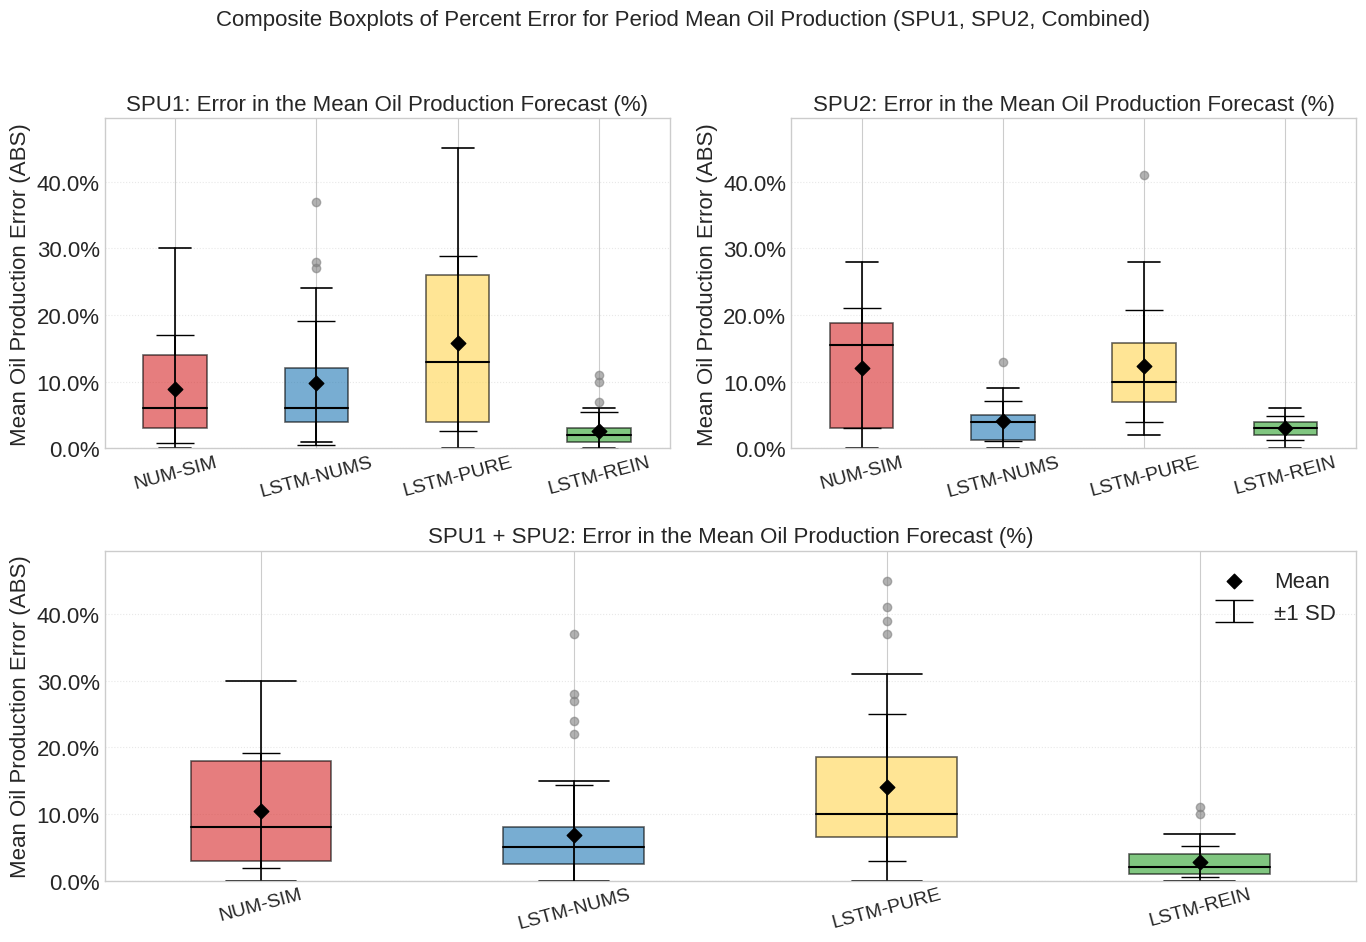

In [2]:

# -*- coding: utf-8 -*-
"""
Composite boxplots for Percent Error of Period Mean Production (SPU1, SPU2, Combined)
- Reads the new dataset of percent errors by method/workflow relative to actual production
- Robust parsing of percentage strings (including negatives)
- Option to plot absolute values (default) or signed values
- Shared Y-axis across panels, Y formatted as %
- Means: black diamond; ±1 SD: error bars
- Labels/titles in English
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import PercentFormatter
from io import StringIO

# ---- Toggle: use absolute percent errors? (True keeps style as before) ----
USE_ABSOLUTE = True

# ---- New dataset (copy/paste) ----
raw_text = """SPU,DATE,NUM_SIM_ProdError,LSTM_NUMS_ProdError,LSTM_PURE_ProdError,LSTM_REIN_ProdError
SPU1,2020/02,15%,37%,37%,11%
SPU1,2020/03,14%,28%,30%,4%
SPU1,2020/04,18%,24%,45%,10%
SPU1,2020/05,9%,27%,39%,5%
SPU1,2020/06,19%,12%,13%,6%
SPU1,2020/07,24%,12%,29%,7%
SPU1,2020/08,25%,15%,30%,1%
SPU1,2020/09,30%,22%,24%,2%
SPU1,2020/10,16%,2%,25%,-3%
SPU1,2020/11,10%,8%,4%,-3%
SPU1,2020/12,8%,-1%,7%,2%
SPU1,2021/01,12%,-6%,26%,-1%
SPU1,2021/02,8%,-3%,10%,0%
SPU1,2021/03,0%,-12%,31%,-3%
SPU1,2021/04,5%,-6%,14%,-3%
SPU1,2021/05,1%,4%,2%,-2%
SPU1,2021/06,2%,-8%,14%,-2%
SPU1,2021/07,1%,-2%,10%,-1%
SPU1,2021/08,-4%,-10%,3%,1%
SPU1,2021/09,-4%,-4%,3%,1%
SPU1,2021/10,0%,-11%,14%,0%
SPU1,2021/11,-3%,-1%,2%,1%
SPU1,2021/12,-5%,-5%,19%,-1%
SPU1,2022/01,-6%,4%,2%,-1%
SPU1,2022/02,-2%,5%,4%,0%
SPU1,2022/03,-5%,-1%,3%,-1%
SPU1,2022/04,-7%,-8%,0%,2%
SPU1,2022/05,-3%,-6%,9%,0%
SPU1,2022/06,-3%,1%,7%,-2%
SPU2,2020/01,-23%,-1%,6%,1%
SPU2,2020/02,-28%,-3%,2%,3%
SPU2,2020/03,-18%,1%,5%,3%
SPU2,2020/04,-19%,2%,7%,1%
SPU2,2020/05,-23%,-5%,7%,3%
SPU2,2020/06,-21%,5%,3%,2%
SPU2,2020/07,-22%,4%,-41%,6%
SPU2,2020/08,-24%,4%,10%,4%
SPU2,2020/09,-18%,6%,9%,6%
SPU2,2020/10,-18%,3%,2%,4%
SPU2,2020/11,-15%,6%,10%,5%
SPU2,2020/12,-13%,8%,9%,3%
SPU2,2021/01,-17%,5%,15%,2%
SPU2,2021/02,-16%,0%,11%,2%
SPU2,2021/03,-16%,1%,8%,2%
SPU2,2021/04,-20%,-1%,4%,3%
SPU2,2021/05,-17%,9%,7%,-2%
SPU2,2021/06,-3%,0%,12%,4%
SPU2,2021/07,-4%,4%,14%,2%
SPU2,2021/08,-3%,8%,17%,6%
SPU2,2021/09,-2%,13%,24%,5%
SPU2,2021/10,-2%,-1%,11%,0%
SPU2,2021/11,0%,5%,9%,2%
SPU2,2021/12,-1%,0%,-14%,5%
SPU2,2022/01,0%,4%,18%,4%
SPU2,2022/02,-3%,5%,16%,5%
SPU2,2022/03,-3%,3%,10%,0%
SPU2,2022/04,-9%,3%,16%,1%
SPU2,2022/05,-4%,8%,25%,4%
SPU2,2022/06,0%,4%,28%,0%
"""

# ---- Read & convert to numeric ----
df = pd.read_csv(StringIO(raw_text))
percent_cols = ["NUM_SIM_ProdError", "LSTM_NUMS_ProdError", "LSTM_PURE_ProdError", "LSTM_REIN_ProdError"]
for col in percent_cols:
    df[col] = df[col].astype(str).str.strip().str.replace("%", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")
    if USE_ABSOLUTE:
        df[col] = np.abs(df[col])

# Dates & sort
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y/%m", errors="coerce")
df = df.sort_values(["SPU", "DATE"]).reset_index(drop=True)

# Split
df_spu1 = df[df["SPU"] == "SPU1"].copy()
df_spu2 = df[df["SPU"] == "SPU2"].copy()
df_comb = pd.concat([df_spu1, df_spu2], ignore_index=True)

# Methods & style
method_cols = percent_cols
labels = ["NUM-SIM", "LSTM-NUMS", "LSTM-PURE", "LSTM-REIN"]
colors = ["#d62728", "#1f77b4", "#ffd54f", "#2ca02c"]

# Shared Y-axis (percent units)
global_max = float(df[method_cols].max().max()) if not df.empty else 0.0
shared_ylim = (0, max(1.0, global_max) * 1.10)

def plot_group(ax, sub_df, title, add_legend=False, ylim=None):
    data_arrays = [sub_df[c].dropna().values for c in method_cols]
    bp = ax.boxplot(
        data_arrays,
        labels=labels,
        patch_artist=True,
        showmeans=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=1.2),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(markerfacecolor="gray", markeredgecolor="gray", alpha=0.6),
    )
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.60)

    # Means and ±1 SD
    for i, arr in enumerate(data_arrays):
        if len(arr) == 0: 
            continue
        mu = float(np.mean(arr))
        sd = float(np.std(arr, ddof=1)) if len(arr) > 1 else 0.0
        ax.scatter(i + 1, mu, marker="D", color="black", s=55, zorder=3,
                   label="Mean" if add_legend and i == 0 else None)
        if sd > 0:
            ax.errorbar(i + 1, mu, yerr=sd, fmt="none", ecolor="black",
                        capsize=14, lw=1.3, zorder=3,
                        label="±1 SD" if add_legend and i == 0 else None)

    ax.set_title(title, fontsize=16)
    ylabel = (
        "Mean Oil Production Error (ABS)"
        if USE_ABSOLUTE else
        "Percent error of period mean production (%)"
    )
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid(True, axis="y", linestyle=":", alpha=0.45)
    ax.tick_params(axis="x", labelrotation=15)

    if ylim is not None:
        ax.set_ylim(*ylim)
    else:
        ymax = sub_df[method_cols].max().max() if not sub_df.empty else 0.0
        ax.set_ylim(0, max(1.0, ymax) * 1.10)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))

    if add_legend:
        ax.legend(loc="upper right", fontsize=16)

# ---- Composite figure ----
plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# ---- FONT CONFIG (Academic style) ----
plt.rcParams.update({
    "font.size": 18,          # tamanho base para textos
    "axes.titlesize": 18,     # títulos dos subplots (ax.set_title)
    "axes.labelsize": 16,     # labels dos eixos (ax.set_ylabel / ax.set_xlabel)
    "xtick.labelsize": 14,    # rótulos dos ticks do eixo X
    "ytick.labelsize": 16,    # rótulos dos ticks do eixo Y
    "legend.fontsize": 16,    # fonte da legenda
    "figure.titlesize": 22    # título principal (fig.suptitle)
})

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

title_suffix = "(absolute)" if USE_ABSOLUTE else "(signed)"
plot_group(ax1, df_spu1, "SPU1: Error in the Mean Oil Production Forecast (%)", add_legend=False, ylim=shared_ylim)
plot_group(ax2, df_spu2, "SPU2: Error in the Mean Oil Production Forecast (%)", add_legend=False, ylim=shared_ylim)
plot_group(ax3, df_comb, "SPU1 + SPU2: Error in the Mean Oil Production Forecast (%)", add_legend=True, ylim=shared_ylim)

fig.suptitle("Composite Boxplots of Percent Error for Period Mean Oil Production (SPU1, SPU2, Combined)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# ---- Save ----
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "Figure03.jpg")
fig.savefig(out_path, dpi=300)


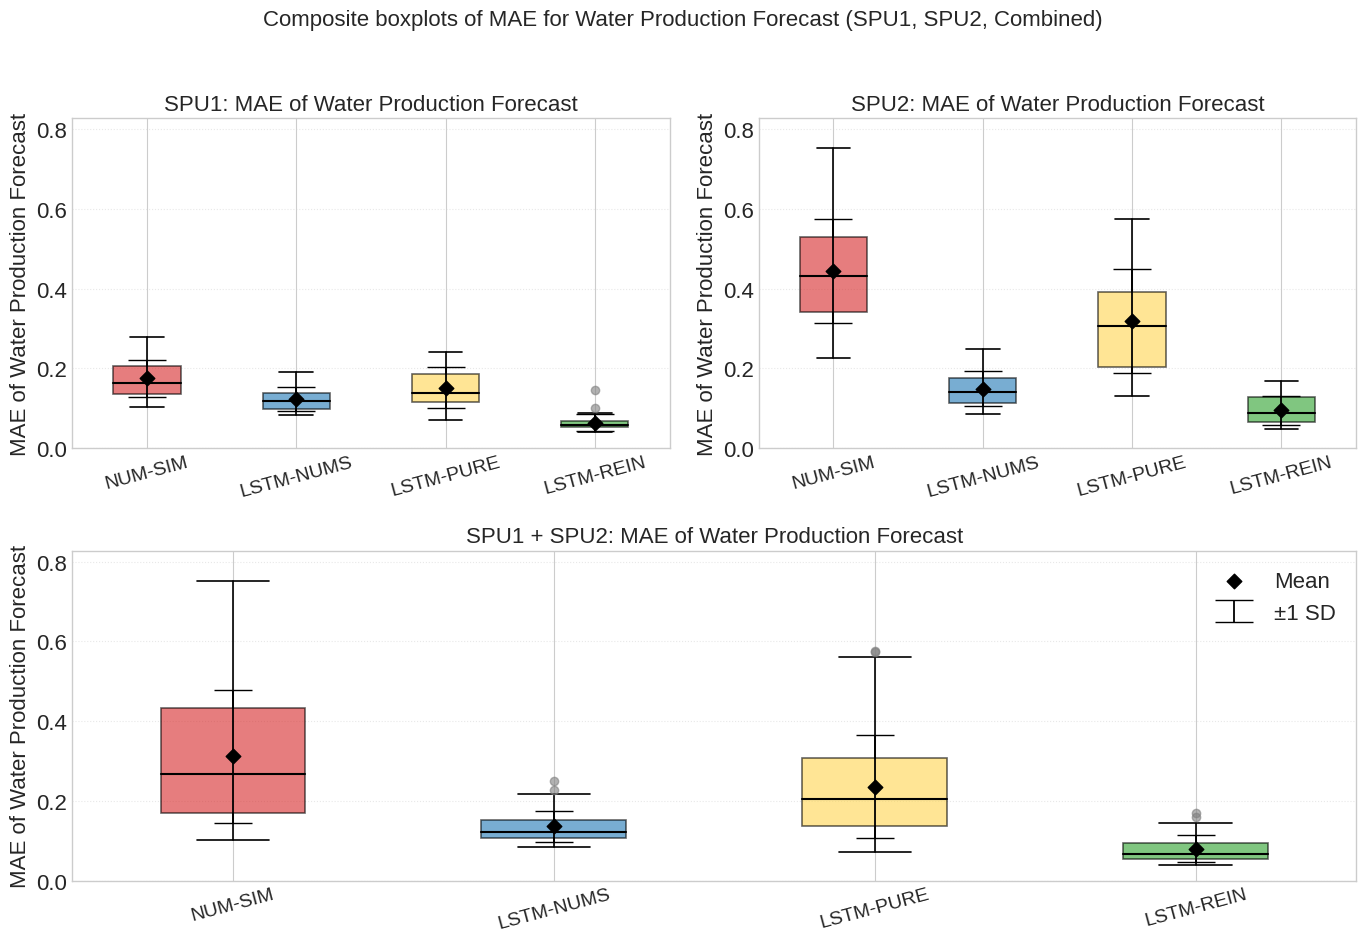

In [3]:

# -*- coding: utf-8 -*-
"""
Composite boxplots (SPU1, SPU2, Combined) for MAE of water production forecast (by method)
- Robust read with explicit columns (SPU, DATE, methods)
- Shared Y-axis across panels (comparability)
- Means: black diamond; ±1 SD: error bars
- Labels/titles in English
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from io import StringIO

# ---- Raw data (MAE of water forecast) ----
raw_text = """
SPU1,2020/02,0.126,0.138,0.128,0.058
SPU1,2020/03,0.126,0.121,0.111,0.056
SPU1,2020/04,0.135,0.131,0.116,0.063
SPU1,2020/05,0.142,0.119,0.157,0.065
SPU1,2020/06,0.178,0.119,0.158,0.064
SPU1,2020/07,0.232,0.108,0.128,0.069
SPU1,2020/08,0.264,0.123,0.136,0.074
SPU1,2020/09,0.213,0.120,0.120,0.084
SPU1,2020/10,0.198,0.102,0.236,0.055
SPU1,2020/11,0.123,0.098,0.119,0.052
SPU1,2020/12,0.135,0.101,0.226,0.057
SPU1,2021/01,0.142,0.107,0.242,0.055
SPU1,2021/02,0.139,0.098,0.084,0.058
SPU1,2021/03,0.174,0.115,0.225,0.053
SPU1,2021/04,0.233,0.090,0.144,0.054
SPU1,2021/05,0.199,0.087,0.178,0.044
SPU1,2021/06,0.205,0.084,0.115,0.043
SPU1,2021/07,0.201,0.092,0.094,0.041
SPU1,2021/08,0.196,0.095,0.102,0.040
SPU1,2021/09,0.216,0.097,0.072,0.040
SPU1,2021/10,0.280,0.137,0.090,0.056
SPU1,2021/11,0.240,0.145,0.139,0.066
SPU1,2021/12,0.150,0.135,0.135,0.067
SPU1,2022/01,0.164,0.161,0.230,0.069
SPU1,2022/02,0.126,0.190,0.139,0.067
SPU1,2022/03,0.159,0.186,0.148,0.079
SPU1,2022/04,0.137,0.183,0.208,0.089
SPU1,2022/05,0.103,0.145,0.187,0.102
SPU1,2022/06,0.158,0.151,0.229,0.146
SPU2,2020/01,0.752,0.151,0.197,0.104
SPU2,2020/02,0.643,0.207,0.500,0.140
SPU2,2020/03,0.510,0.183,0.486,0.137
SPU2,2020/04,0.513,0.227,0.165,0.139
SPU2,2020/05,0.467,0.217,0.330,0.138
SPU2,2020/06,0.543,0.249,0.296,0.169
SPU2,2020/07,0.583,0.216,0.574,0.161
SPU2,2020/08,0.560,0.166,0.366,0.086
SPU2,2020/09,0.534,0.170,0.560,0.128
SPU2,2020/10,0.659,0.140,0.576,0.121
SPU2,2020/11,0.405,0.178,0.286,0.114
SPU2,2020/12,0.418,0.200,0.407,0.091
SPU2,2021/01,0.446,0.152,0.160,0.129
SPU2,2021/02,0.501,0.123,0.370,0.089
SPU2,2021/03,0.483,0.120,0.343,0.070
SPU2,2021/04,0.488,0.110,0.356,0.069
SPU2,2021/05,0.589,0.139,0.313,0.065
SPU2,2021/06,0.226,0.102,0.275,0.065
SPU2,2021/07,0.285,0.100,0.171,0.054
SPU2,2021/08,0.305,0.147,0.204,0.064
SPU2,2021/09,0.298,0.087,0.400,0.047
SPU2,2021/10,0.341,0.113,0.169,0.096
SPU2,2021/11,0.347,0.098,0.206,0.085
SPU2,2021/12,0.380,0.110,0.368,0.080
SPU2,2022/01,0.403,0.115,0.236,0.067
SPU2,2022/02,0.372,0.150,0.226,0.131
SPU2,2022/03,0.387,0.140,0.302,0.065
SPU2,2022/04,0.267,0.111,0.131,0.054
SPU2,2022/05,0.275,0.118,0.163,0.049
SPU2,2022/06,0.324,0.140,0.402,0.047
"""

# Read with explicit column names
colnames = ["SPU", "DATE", "NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]
df = pd.read_csv(StringIO(raw_text), header=None, names=colnames)

# Types & date
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y/%m", errors="coerce")
for c in ["NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.sort_values(["SPU", "DATE"]).reset_index(drop=True)

# Groups
spu1 = df[df["SPU"] == "SPU1"].copy()
spu2 = df[df["SPU"] == "SPU2"].copy()
comb = pd.concat([spu1, spu2], ignore_index=True)

# Methods & style
method_cols = ["NUM_SIM_MAE", "LSTM_NUMS_MAE", "LSTM_PURE_MAE", "LSTM_REIN_MAE"]
labels = ["NUM-SIM", "LSTM-NUMS", "LSTM-PURE", "LSTM-REIN"]
colors = ["#d62728", "#1f77b4", "#ffd54f", "#2ca02c"]

# Shared Y axis
global_max = float(df[method_cols].max().max()) if not df.empty else 0.0
shared_ylim = (0, max(0.01, global_max) * 1.10)

def plot_group(ax, sub_df, title, add_legend=False, ylim=None):
    data_arrays = [sub_df[c].dropna().values for c in method_cols]
    bp = ax.boxplot(
        data_arrays,
        labels=labels,
        patch_artist=True,
        showmeans=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=1.2),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(markerfacecolor="gray", markeredgecolor="gray", alpha=0.6),
    )
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.60)

    # Means and ±1 SD
    for i, arr in enumerate(data_arrays):
        if len(arr) == 0:
            continue
        mu = float(np.mean(arr))
        sd = float(np.std(arr, ddof=1)) if len(arr) > 1 else 0.0
        ax.scatter(i + 1, mu, marker="D", color="black", s=55, zorder=3,
                   label="Mean" if add_legend and i == 0 else None)
        if sd > 0:
            ax.errorbar(i + 1, mu, yerr=sd, fmt="none", ecolor="black",
                        capsize=14, lw=1.3, zorder=3,
                        label="±1 SD" if add_legend and i == 0 else None)

    ax.set_title(title, fontsize=16)
    ax.set_ylabel("MAE of Water Production Forecast", fontsize=16)
    ax.grid(True, axis="y", linestyle=":", alpha=0.45)
    ax.tick_params(axis="x", labelrotation=15)

    if ylim is not None:
        ax.set_ylim(*ylim)
    else:
        ymax = sub_df[method_cols].max().max() if not sub_df.empty else 0.0
        ax.set_ylim(0, max(0.01, ymax) * 1.10)

    if add_legend:
        ax.legend(loc="upper right", fontsize=16)

# Composite figure
plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# ---- FONT CONFIG (Academic style) ----
plt.rcParams.update({
    "font.size": 18,          # tamanho base para textos
    "axes.titlesize": 18,     # títulos dos subplots (ax.set_title)
    "axes.labelsize": 16,     # labels dos eixos (ax.set_ylabel / ax.set_xlabel)
    "xtick.labelsize": 14,    # rótulos dos ticks do eixo X
    "ytick.labelsize": 16,    # rótulos dos ticks do eixo Y
    "legend.fontsize": 16,    # fonte da legenda
    "figure.titlesize": 22    # título principal (fig.suptitle)
})

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

plot_group(ax1, spu1, "SPU1: MAE of Water Production Forecast", add_legend=False, ylim=shared_ylim)
plot_group(ax2, spu2, "SPU2: MAE of Water Production Forecast", add_legend=False, ylim=shared_ylim)
plot_group(ax3, comb, "SPU1 + SPU2: MAE of Water Production Forecast", add_legend=True, ylim=shared_ylim)

fig.suptitle("Composite boxplots of MAE for Water Production Forecast (SPU1, SPU2, Combined)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Save
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "Figure04.jpg")
fig.savefig(out_path, dpi=300)


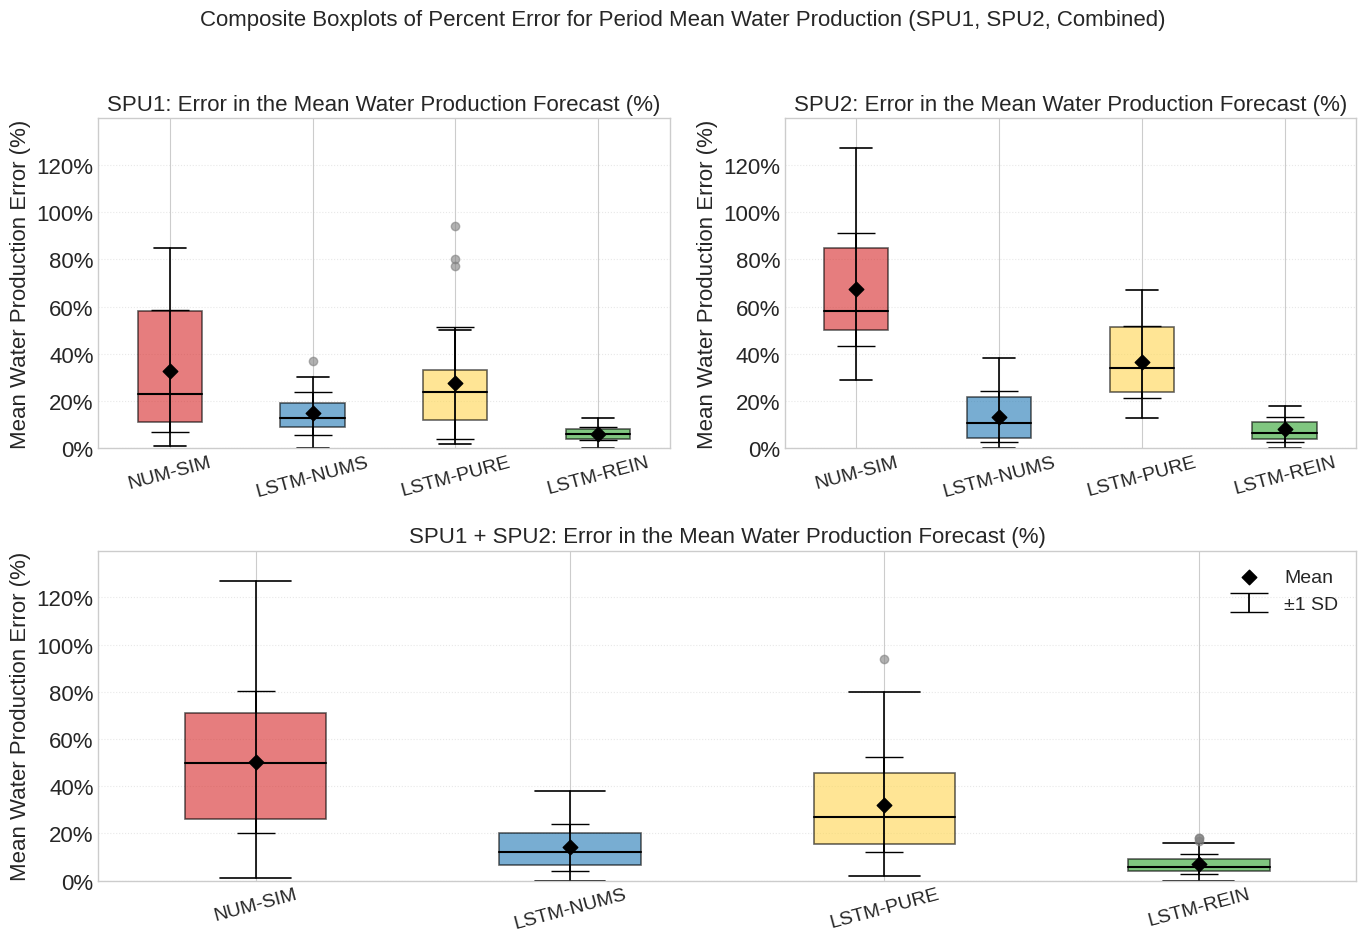

In [4]:

# -*- coding: utf-8 -*-
"""
Composite boxplots for Absolute Percent Error of Period‑Mean Water Production (SPU1, SPU2, Combined)
- Updated with corrected data series provided by user
- Academic English for all labels and titles
- Parses percent strings (incl. negatives) and plots absolute values
- Shared Y-axis; axis formatted as percent
- Means as black diamond; ±1 SD error bars
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import PercentFormatter
from io import StringIO

USE_ABSOLUTE = True  # absolute percent error (module)

# ---- Corrected dataset ----
raw_text = """SPU,DATE,NUM_SIM_ProdError,LSTM_NUMS_ProdError,LSTM_PURE_ProdError,LSTM_REIN_ProdError
SPU1,2020/02,-7%,-37%,-32%,-7%
SPU1,2020/03,2%,-18%,2%,-6%
SPU1,2020/04,4%,-11%,2%,-8%
SPU1,2020/05,10%,-12%,-45%,-7%
SPU1,2020/06,36%,-11%,-14%,-4%
SPU1,2020/07,70%,-2%,-14%,-4%
SPU1,2020/08,85%,16%,24%,-8%
SPU1,2020/09,65%,19%,12%,-8%
SPU1,2020/10,49%,0%,-94%,-5%
SPU1,2020/11,6%,-11%,-27%,-6%
SPU1,2020/12,11%,-9%,-24%,-5%
SPU1,2021/01,20%,-3%,-80%,-4%
SPU1,2021/02,23%,4%,-6%,-4%
SPU1,2021/03,37%,12%,-77%,-5%
SPU1,2021/04,74%,13%,-49%,-9%
SPU1,2021/05,62%,14%,-50%,-2%
SPU1,2021/06,61%,9%,-36%,-4%
SPU1,2021/07,61%,8%,-5%,-5%
SPU1,2021/08,56%,7%,-12%,-5%
SPU1,2021/09,58%,16%,10%,-4%
SPU1,2021/10,42%,19%,-4%,0%
SPU1,2021/11,29%,6%,-25%,-8%
SPU1,2021/12,-11%,-19%,-12%,-6%
SPU1,2022/01,-10%,-27%,-33%,-5%
SPU1,2022/02,-14%,-30%,-9%,-7%
SPU1,2022/03,-21%,-29%,-16%,-10%
SPU1,2022/04,-13%,-27%,-26%,-11%
SPU1,2022/05,1%,-20%,-27%,-13%
SPU1,2022/06,11%,-20%,-32%,-10%
SPU2,2020/01,127%,1%,-22%,-9%
SPU2,2020/02,115%,-20%,-46%,-14%
SPU2,2020/03,81%,-24%,-67%,-16%
SPU2,2020/04,76%,-20%,-15%,-16%
SPU2,2020/05,72%,-36%,-54%,-18%
SPU2,2020/06,85%,-38%,-53%,-17%
SPU2,2020/07,90%,-28%,-58%,-18%
SPU2,2020/08,85%,-22%,-56%,-5%
SPU2,2020/09,79%,-21%,-47%,-13%
SPU2,2020/10,91%,-22%,-53%,-11%
SPU2,2020/11,47%,-27%,-32%,-11%
SPU2,2020/12,54%,-26%,-45%,-8%
SPU2,2021/01,59%,-9%,-40%,-4%
SPU2,2021/02,69%,-2%,-53%,-9%
SPU2,2021/03,87%,-12%,-34%,-8%
SPU2,2021/04,84%,0%,-14%,-4%
SPU2,2021/05,102%,6%,-23%,-6%
SPU2,2021/06,29%,-15%,-19%,-4%
SPU2,2021/07,41%,-4%,-13%,-5%
SPU2,2021/08,42%,-4%,-24%,-2%
SPU2,2021/09,40%,-12%,-55%,-4%
SPU2,2021/10,46%,-10%,-26%,-8%
SPU2,2021/11,50%,-10%,-39%,-7%
SPU2,2021/12,55%,-11%,-42%,-6%
SPU2,2022/01,57%,1%,-32%,-5%
SPU2,2022/02,50%,-8%,-19%,-6%
SPU2,2022/03,55%,-7%,-34%,2%
SPU2,2022/04,43%,-1%,-26%,-1%
SPU2,2022/05,50%,-5%,-24%,-2%
SPU2,2022/06,57%,-1%,-33%,0%
"""

# ---- Read & parse ----
df = pd.read_csv(StringIO(raw_text))
percent_cols = ["NUM_SIM_ProdError", "LSTM_NUMS_ProdError", "LSTM_PURE_ProdError", "LSTM_REIN_ProdError"]
for col in percent_cols:
    df[col] = df[col].astype(str).str.strip().str.replace("%", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")
    if USE_ABSOLUTE:
        df[col] = np.abs(df[col])

df["DATE"] = pd.to_datetime(df["DATE"], format="%Y/%m", errors="coerce")
df = df.sort_values(["SPU", "DATE"]).reset_index(drop=True)

# ---- Groups ----
df_spu1 = df[df["SPU"] == "SPU1"].copy()
df_spu2 = df[df["SPU"] == "SPU2"].copy()
df_comb = pd.concat([df_spu1, df_spu2], ignore_index=True)

# ---- Labels & styles (academic English) ----
method_cols = percent_cols
xlabels = ["NUM-SIM", "LSTM-NUMS", "LSTM-PURE", "LSTM-REIN"]
colors = ["#d62728", "#1f77b4", "#ffd54f", "#2ca02c"]

# Shared Y-axis
global_max = float(df[method_cols].max().max()) if not df.empty else 0.0
shared_ylim = (0, max(1.0, global_max) * 1.10)

def plot_group(ax, sub_df, title, add_legend=False, ylim=None):
    data_arrays = [sub_df[c].dropna().values for c in method_cols]
    bp = ax.boxplot(
        data_arrays,
        labels=xlabels,
        patch_artist=True,
        showmeans=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=1.2),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(markerfacecolor="gray", markeredgecolor="gray", alpha=0.6),
    )
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.60)

    # Means and ±1 SD
    for i, arr in enumerate(data_arrays):
        if len(arr) == 0:
            continue
        mu = float(np.mean(arr))
        sd = float(np.std(arr, ddof=1)) if len(arr) > 1 else 0.0
        ax.scatter(i + 1, mu, marker="D", color="black", s=55, zorder=3,
                   label="Mean" if add_legend and i == 0 else None)
        if sd > 0:
            ax.errorbar(i + 1, mu, yerr=sd, fmt="none", ecolor="black",
                        capsize=14, lw=1.3, zorder=3,
                        label="±1 SD" if add_legend and i == 0 else None)

    ax.set_title(title, fontsize=16)
    ylabel = "Mean Water Production Error (%)"
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid(True, axis="y", linestyle=":", alpha=0.45)
    ax.tick_params(axis="x", labelrotation=15)

    if ylim is not None:
        ax.set_ylim(*ylim)
    else:
        ymax = sub_df[method_cols].max().max() if not sub_df.empty else 0.0
        ax.set_ylim(0, max(1.0, ymax) * 1.10)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))

    if add_legend:
        ax.legend(loc="upper right", fontsize=14)

# ---- Figure ----
plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# ---- FONT CONFIG (Academic style) ----
plt.rcParams.update({
    "font.size": 18,          # tamanho base para textos
    "axes.titlesize": 18,     # títulos dos subplots (ax.set_title)
    "axes.labelsize": 16,     # labels dos eixos (ax.set_ylabel / ax.set_xlabel)
    "xtick.labelsize": 14,    # rótulos dos ticks do eixo X
    "ytick.labelsize": 16,    # rótulos dos ticks do eixo Y
    "legend.fontsize": 16,    # fonte da legenda
    "figure.titlesize": 22    # título principal (fig.suptitle)
})

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

plot_group(ax1, df_spu1, "SPU1: Error in the Mean Water Production Forecast (%)",
           add_legend=False, ylim=shared_ylim)
plot_group(ax2, df_spu2, "SPU2: Error in the Mean Water Production Forecast (%)",
           add_legend=False, ylim=shared_ylim)
plot_group(ax3, df_comb, "SPU1 + SPU2: Error in the Mean Water Production Forecast (%)",
           add_legend=True, ylim=shared_ylim)

fig.suptitle("Composite Boxplots of Percent Error for Period Mean Water Production (SPU1, SPU2, Combined)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# ---- Save ----
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "Figure05.jpg")
fig.savefig(out_path, dpi=300)


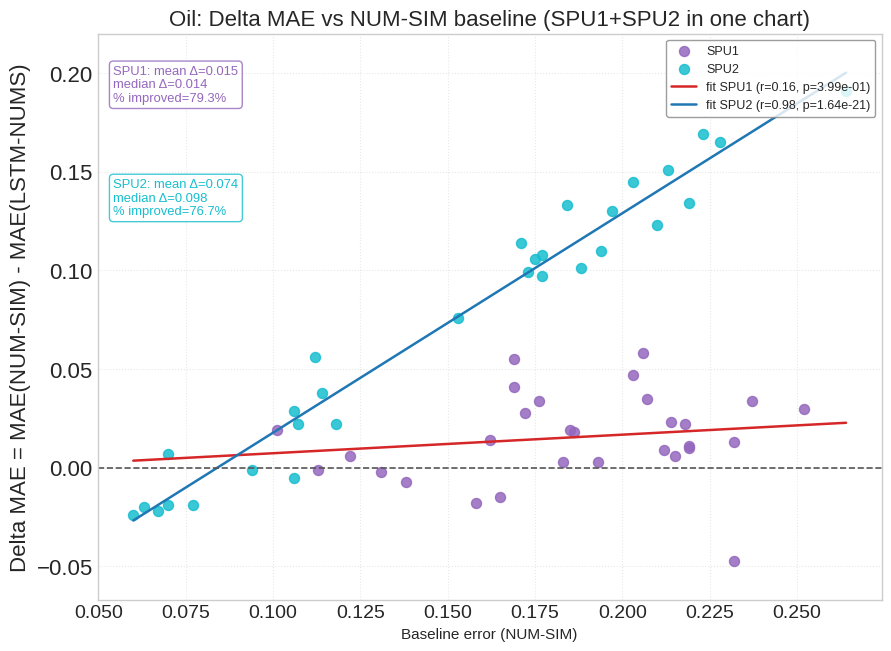

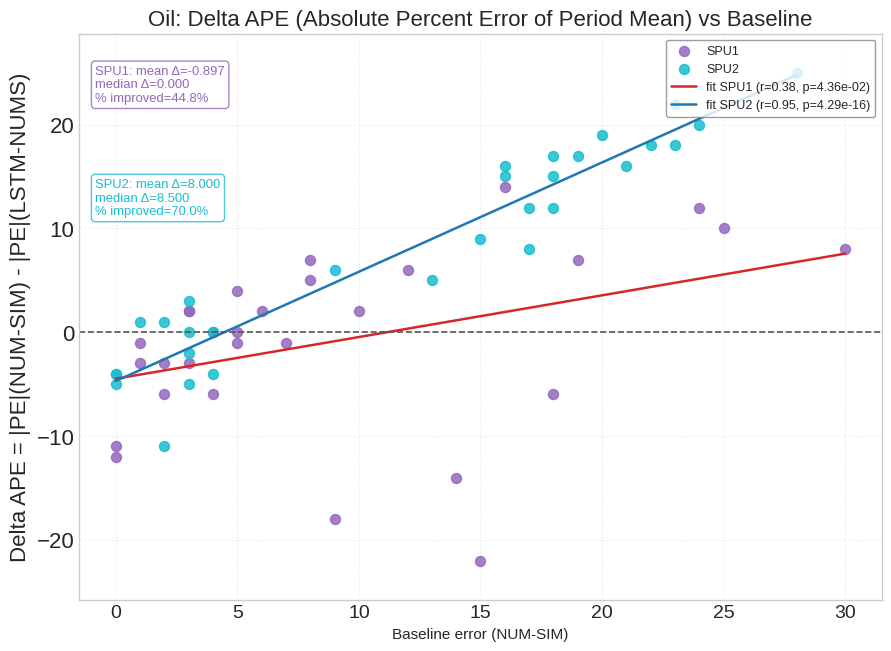

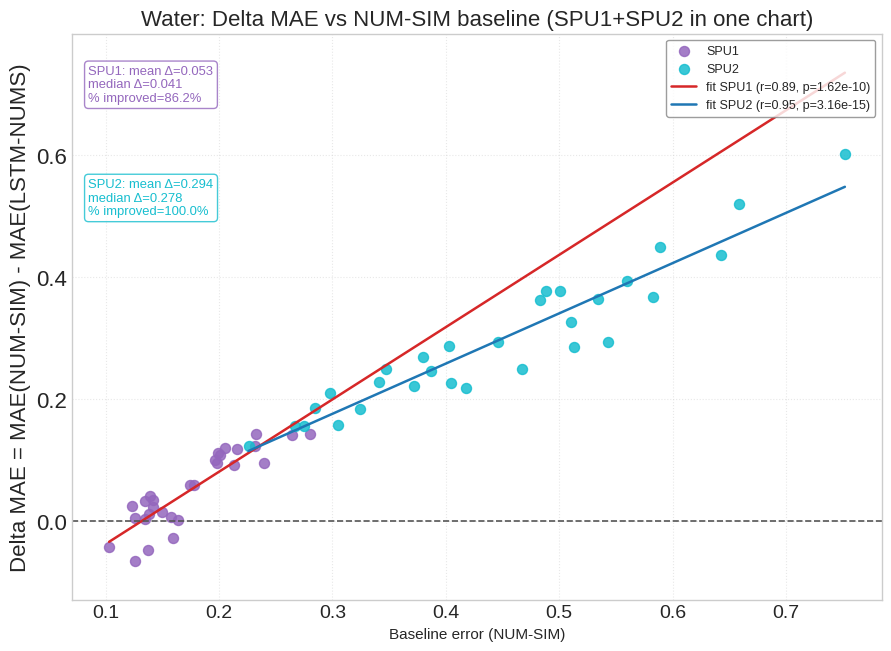

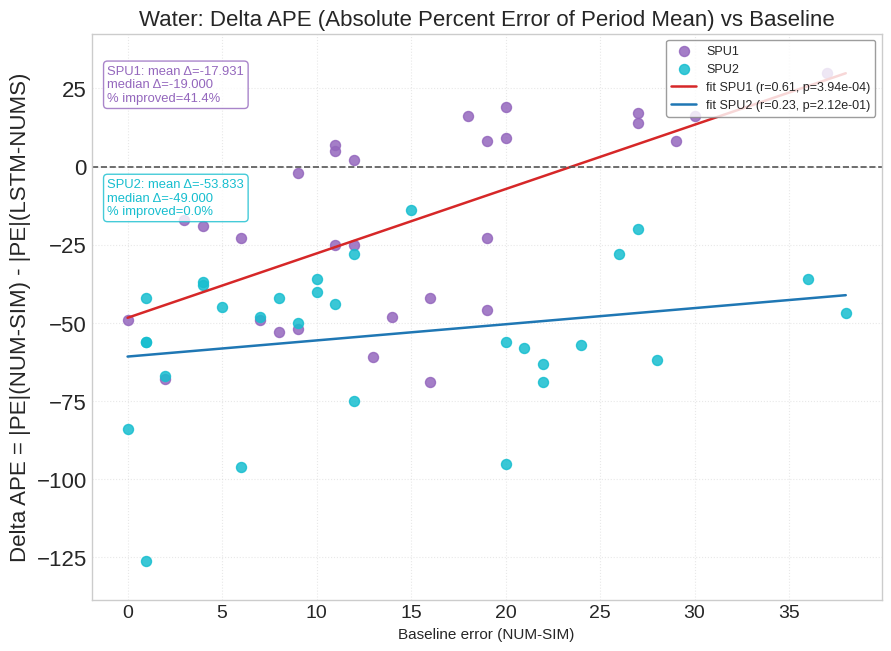

In [5]:

# -*- coding: utf-8 -*-
"""
Gera e EXIBE na tela 4 gráficos combinados (SPU1+SPU2 no mesmo gráfico), com anti-sobreposição:
1) Oil — Delta MAE vs baseline (NUM-SIM)
2) Oil — Delta APE (absolute percent error of period mean) vs baseline
3) Water — Delta MAE vs baseline (NUM-SIM)
4) Water — Delta APE (absolute percent error of period mean) vs baseline

- Delta MAE = MAE(NUM-SIM) - MAE(LSTM-NUMS)
- Delta APE = |PE|(NUM-SIM) - |PE|(LSTM-NUMS)

Salva PNG (300 DPI), exibe com plt.show(), e usa constrained_layout para espaçamentos.
Opcional: exportar PDF/SVG vetorial.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from scipy import stats

plt.style.use("seaborn-v0_8-whitegrid")

# Cores para distinguir SPUs
COLOR_SPU1 = "#9467bd"   # roxo
COLOR_SPU2 = "#17becf"   # teal
COLOR_ZERO = "#555555"   # linha zero
COLOR_FIT1 = "#d62728"   # reta SPU1 (vermelho)
COLOR_FIT2 = "#1f77b4"   # reta SPU2 (azul)

SAVE_PDF_SVG = False  # mude para True para salvar também .pdf/.svg

# ---------- 1) Oil – MAE (curva) ----------
raw_oil_mae = StringIO(
    """SPU,DATE,MAE_NUM_SIM,MAE_LSTM_NUMS
SPU1,2020/02,0.232,0.279
SPU1,2020/03,0.232,0.219
SPU1,2020/04,0.252,0.222
SPU1,2020/05,0.219,0.209
SPU1,2020/06,0.237,0.203
SPU1,2020/07,0.218,0.196
SPU1,2020/08,0.215,0.209
SPU1,2020/09,0.214,0.191
SPU1,2020/10,0.206,0.148
SPU1,2020/11,0.176,0.142
SPU1,2020/12,0.169,0.128
SPU1,2021/01,0.183,0.180
SPU1,2021/02,0.207,0.172
SPU1,2021/03,0.219,0.208
SPU1,2021/04,0.185,0.166
SPU1,2021/05,0.162,0.148
SPU1,2021/06,0.165,0.180
SPU1,2021/07,0.186,0.168
SPU1,2021/08,0.193,0.190
SPU1,2021/09,0.203,0.156
SPU1,2021/10,0.212,0.203
SPU1,2021/11,0.169,0.114
SPU1,2021/12,0.172,0.144
SPU1,2022/01,0.158,0.176
SPU1,2022/02,0.138,0.145
SPU1,2022/03,0.122,0.116
SPU1,2022/04,0.131,0.133
SPU1,2022/05,0.113,0.114
SPU1,2022/06,0.101,0.082
SPU2,2020/01,0.223,0.054
SPU2,2020/02,0.264,0.073
SPU2,2020/03,0.171,0.057
SPU2,2020/04,0.184,0.051
SPU2,2020/05,0.219,0.085
SPU2,2020/06,0.203,0.058
SPU2,2020/07,0.213,0.062
SPU2,2020/08,0.228,0.063
SPU2,2020/09,0.177,0.069
SPU2,2020/10,0.175,0.069
SPU2,2020/11,0.153,0.077
SPU2,2020/12,0.173,0.074
SPU2,2021/01,0.197,0.067
SPU2,2021/02,0.194,0.084
SPU2,2021/03,0.177,0.080
SPU2,2021/04,0.210,0.087
SPU2,2021/05,0.188,0.087
SPU2,2021/06,0.106,0.077
SPU2,2021/07,0.112,0.056
SPU2,2021/08,0.114,0.076
SPU2,2021/09,0.106,0.111
SPU2,2021/10,0.107,0.085
SPU2,2021/11,0.070,0.063
SPU2,2021/12,0.067,0.089
SPU2,2022/01,0.063,0.083
SPU2,2022/02,0.070,0.089
SPU2,2022/03,0.077,0.096
SPU2,2022/04,0.118,0.096
SPU2,2022/05,0.094,0.095
SPU2,2022/06,0.060,0.084
"""
)
DF_OIL_MAE = pd.read_csv(raw_oil_mae)

# ---------- 2) Oil – percentual (assinado; converter para APE) ----------
raw_oil_pct = StringIO(
    """SPU,DATE,NUM_SIM_ProdError,LSTM_NUMS_ProdError
SPU1,2020/02,15%,37%
SPU1,2020/03,14%,28%
SPU1,2020/04,18%,24%
SPU1,2020/05,9%,27%
SPU1,2020/06,19%,12%
SPU1,2020/07,24%,12%
SPU1,2020/08,25%,15%
SPU1,2020/09,30%,22%
SPU1,2020/10,16%,2%
SPU1,2020/11,10%,8%
SPU1,2020/12,8%,-1%
SPU1,2021/01,12%,-6%
SPU1,2021/02,8%,-3%
SPU1,2021/03,0%,-12%
SPU1,2021/04,5%,-6%
SPU1,2021/05,1%,4%
SPU1,2021/06,2%,-8%
SPU1,2021/07,1%,-2%
SPU1,2021/08,-4%,-10%
SPU1,2021/09,-4%,-4%
SPU1,2021/10,0%,-11%
SPU1,2021/11,-3%,-1%
SPU1,2021/12,-5%,-5%
SPU1,2022/01,-6%,4%
SPU1,2022/02,-2%,5%
SPU1,2022/03,-5%,-1%
SPU1,2022/04,-7%,-8%
SPU1,2022/05,-3%,-6%
SPU1,2022/06,-3%,1%
SPU2,2020/01,-23%,-1%
SPU2,2020/02,-28%,-3%
SPU2,2020/03,-18%,1%
SPU2,2020/04,-19%,2%
SPU2,2020/05,-23%,-5%
SPU2,2020/06,-21%,5%
SPU2,2020/07,-22%,4%
SPU2,2020/08,-24%,4%
SPU2,2020/09,-18%,6%
SPU2,2020/10,-18%,3%
SPU2,2020/11,-15%,6%
SPU2,2020/12,-13%,8%
SPU2,2021/01,-17%,5%
SPU2,2021/02,-16%,0%
SPU2,2021/03,-16%,1%
SPU2,2021/04,-20%,-1%
SPU2,2021/05,-17%,9%
SPU2,2021/06,-3%,0%
SPU2,2021/07,-4%,4%
SPU2,2021/08,-3%,8%
SPU2,2021/09,-2%,13%
SPU2,2021/10,-2%,-1%
SPU2,2021/11,0%,5%
SPU2,2021/12,-1%,0%
SPU2,2022/01,0%,4%
SPU2,2022/02,-3%,5%
SPU2,2022/03,-3%,3%
SPU2,2022/04,-9%,3%
SPU2,2022/05,-4%,8%
SPU2,2022/06,0%,4%
"""
)
DF_OIL_PCT = pd.read_csv(raw_oil_pct)

# ---------- 3) Water – MAE (curva) ----------
raw_water_mae = StringIO(
    """SPU,DATE,MAE_NUM_SIM,MAE_LSTM_NUMS
SPU1,2020/02,0.138,0.126
SPU1,2020/03,0.126,0.121
SPU1,2020/04,0.135,0.131
SPU1,2020/05,0.142,0.119
SPU1,2020/06,0.178,0.119
SPU1,2020/07,0.232,0.108
SPU1,2020/08,0.264,0.123
SPU1,2020/09,0.213,0.120
SPU1,2020/10,0.198,0.102
SPU1,2020/11,0.123,0.098
SPU1,2020/12,0.135,0.101
SPU1,2021/01,0.142,0.107
SPU1,2021/02,0.139,0.098
SPU1,2021/03,0.174,0.115
SPU1,2021/04,0.233,0.090
SPU1,2021/05,0.199,0.087
SPU1,2021/06,0.205,0.084
SPU1,2021/07,0.201,0.092
SPU1,2021/08,0.196,0.095
SPU1,2021/09,0.216,0.097
SPU1,2021/10,0.280,0.137
SPU1,2021/11,0.240,0.145
SPU1,2021/12,0.150,0.135
SPU1,2022/01,0.164,0.161
SPU1,2022/02,0.126,0.190
SPU1,2022/03,0.159,0.186
SPU1,2022/04,0.137,0.183
SPU1,2022/05,0.103,0.145
SPU1,2022/06,0.158,0.151
SPU2,2020/01,0.752,0.151
SPU2,2020/02,0.643,0.207
SPU2,2020/03,0.510,0.183
SPU2,2020/04,0.513,0.227
SPU2,2020/05,0.467,0.217
SPU2,2020/06,0.543,0.249
SPU2,2020/07,0.583,0.216
SPU2,2020/08,0.560,0.166
SPU2,2020/09,0.534,0.170
SPU2,2020/10,0.659,0.140
SPU2,2020/11,0.405,0.178
SPU2,2020/12,0.418,0.200
SPU2,2021/01,0.446,0.152
SPU2,2021/02,0.501,0.123
SPU2,2021/03,0.483,0.120
SPU2,2021/04,0.488,0.110
SPU2,2021/05,0.589,0.139
SPU2,2021/06,0.226,0.102
SPU2,2021/07,0.285,0.100
SPU2,2021/08,0.305,0.147
SPU2,2021/09,0.298,0.087
SPU2,2021/10,0.341,0.113
SPU2,2021/11,0.347,0.098
SPU2,2021/12,0.380,0.110
SPU2,2022/01,0.403,0.115
SPU2,2022/02,0.372,0.150
SPU2,2022/03,0.387,0.140
SPU2,2022/04,0.267,0.111
SPU2,2022/05,0.275,0.118
SPU2,2022/06,0.324,0.140
"""
)
DF_WATER_MAE = pd.read_csv(raw_water_mae)

# ---------- 4) Water – percentual (assinado; converter para APE) ----------
raw_water_pct = StringIO(
    """SPU,DATE,NUM_SIM_ProdError,LSTM_NUMS_ProdError
SPU1,2020/02,-37%,-7%
SPU1,2020/03,-18%,2%
SPU1,2020/04,-11%,4%
SPU1,2020/05,-12%,10%
SPU1,2020/06,-11%,36%
SPU1,2020/07,-2%,70%
SPU1,2020/08,16%,85%
SPU1,2020/09,19%,65%
SPU1,2020/10,0%,49%
SPU1,2020/11,-11%,6%
SPU1,2020/12,-9%,11%
SPU1,2021/01,-3%,20%
SPU1,2021/02,4%,23%
SPU1,2021/03,12%,37%
SPU1,2021/04,13%,74%
SPU1,2021/05,14%,62%
SPU1,2021/06,9%,61%
SPU1,2021/07,8%,61%
SPU1,2021/08,7%,56%
SPU1,2021/09,16%,58%
SPU1,2021/10,19%,42%
SPU1,2021/11,6%,29%
SPU1,2021/12,-19%,-11%
SPU1,2022/01,-27%,-10%
SPU1,2022/02,-30%,-14%
SPU1,2022/03,-29%,-21%
SPU1,2022/04,-27%,-13%
SPU1,2022/05,-20%,1%
SPU1,2022/06,-20%,11%
SPU2,2020/01,1%,127%
SPU2,2020/02,-20%,115%
SPU2,2020/03,-24%,81%
SPU2,2020/04,-20%,76%
SPU2,2020/05,-36%,72%
SPU2,2020/06,-38%,85%
SPU2,2020/07,-28%,90%
SPU2,2020/08,-22%,85%
SPU2,2020/09,-21%,79%
SPU2,2020/10,-22%,91%
SPU2,2020/11,-27%,47%
SPU2,2020/12,-26%,54%
SPU2,2021/01,-9%,59%
SPU2,2021/02,-2%,69%
SPU2,2021/03,-12%,87%
SPU2,2021/04,0%,84%
SPU2,2021/05,6%,102%
SPU2,2021/06,-15%,29%
SPU2,2021/07,-4%,41%
SPU2,2021/08,-4%,42%
SPU2,2021/09,-12%,40%
SPU2,2021/10,-10%,46%
SPU2,2021/11,-10%,50%
SPU2,2021/12,-11%,55%
SPU2,2022/01,1%,57%
SPU2,2022/02,-8%,50%
SPU2,2022/03,-7%,55%
SPU2,2022/04,-1%,43%
SPU2,2022/05,-5%,50%
SPU2,2022/06,-1%,57%
"""
)
DF_WATER_PCT = pd.read_csv(raw_water_pct)

# ---------- Converter percentuais para APE ----------
def to_ape(df: pd.DataFrame, cols):
    df2 = df.copy()
    for c in cols:
        df2[c] = df2[c].astype(str).str.replace("%", "", regex=False)
        df2[c] = pd.to_numeric(df2[c], errors="coerce")
        df2[c] = np.abs(df2[c])
    return df2

DF_OIL_PCT = to_ape(DF_OIL_PCT, ["NUM_SIM_ProdError", "LSTM_NUMS_ProdError"])
DF_WATER_PCT = to_ape(DF_WATER_PCT, ["NUM_SIM_ProdError", "LSTM_NUMS_ProdError"])

# ---------- Função de plot (SPU1+SPU2 juntos) com anti-sobreposição ----------
def plot_combined_spu(df: pd.DataFrame,
                      base_col: str,
                      hybrid_col: str,
                      title: str,
                      y_label: str,
                      out_png: str):
    """
    X = erro-base (NUM-SIM); Y = Delta = base - hibrido; regressão e stats por SPU.
    Anti-sobreposição:
    - constrained_layout para espaçamentos
    - legenda no canto superior direito com fundo semi-opaco
    - stats boxes no lado esquerdo (top-left e bottom-left) e ajuste simples anti-colisão
    - margens em Y para evitar clipe de textos
    """
    fig, ax = plt.subplots(figsize=(8.8, 6.4), constrained_layout=True)

    df1 = df[df["SPU"] == "SPU1"].copy()
    df2 = df[df["SPU"] == "SPU2"].copy()

    b1, h1 = df1[base_col].values, df1[hybrid_col].values
    b2, h2 = df2[base_col].values, df2[hybrid_col].values
    d1, d2 = b1 - h1, b2 - h2

    # Scatter por SPU
    ax.scatter(b1, d1, color=COLOR_SPU1, s=52, alpha=0.85, label="SPU1")
    ax.scatter(b2, d2, color=COLOR_SPU2, s=52, alpha=0.85, label="SPU2")

    # Regressões
    def fit_and_plot(b, d, color, lab_tag):
        mask = np.isfinite(b) & np.isfinite(d)
        if mask.sum() >= 2:
            slope, intercept, r, p, _ = stats.linregress(b[mask], d[mask])
            xline = np.linspace(min(b.min(), b2.min()), max(b.max(), b2.max()), 120)
            ax.plot(xline, intercept + slope * xline, color=color, lw=1.8,
                    label=f"fit {lab_tag} (r={r:.2f}, p={p:.2e})")

    fit_and_plot(b1, d1, COLOR_FIT1, "SPU1")
    fit_and_plot(b2, d2, COLOR_FIT2, "SPU2")

    # Linha zero e margens
    ax.axhline(0.0, color=COLOR_ZERO, lw=1.2, linestyle="--")
    ax.margins(y=0.08)

    # Legenda: canto superior direito com fundo semi-opaco
    ax.legend(loc="upper right", fontsize=9,
              frameon=True, facecolor="white", edgecolor="#888", framealpha=0.82)

    # Estatísticas anotadas (lado esquerdo) com ajuste simples anti-colisão
    def annotate_stats(tag, b, d, x_rel, y_rel, color):
        pct_imp = (d > 0).mean() * 100.0
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        x = x_min + x_rel * (x_max - x_min)
        y = y_min + y_rel * (y_max - y_min)
        return ax.text(
            x, y,
            f"{tag}: mean Δ={np.nanmean(d):.3f}\nmedian Δ={np.nanmedian(d):.3f}\n% improved={pct_imp:.1f}%",
            fontsize=9.4, color=color,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.80, edgecolor=color)
        )

    # Posições iniciais: topo-esquerda (SPU1) e mais abaixo (SPU2)
    txt1 = annotate_stats("SPU1", b1, d1, x_rel=0.02, y_rel=0.88, color=COLOR_SPU1)
    txt2 = annotate_stats("SPU2", b2, d2, x_rel=0.02, y_rel=0.68, color=COLOR_SPU2)

    # Anti-colisão simples: se as caixas se sobrepõem visualmente, reposiciona SPU2 mais abaixo
    fig.canvas.draw()  # atualiza posições
    bb1 = txt1.get_window_extent(fig.canvas.get_renderer())
    bb2 = txt2.get_window_extent(fig.canvas.get_renderer())
    if bb1.overlaps(bb2):
        txt2.remove()
        txt2 = annotate_stats("SPU2", b2, d2, x_rel=0.02, y_rel=0.54, color=COLOR_SPU2)

    # Títulos e eixos
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Baseline error (NUM-SIM)", fontsize=11)
    ax.set_ylabel(y_label, fontsize=16)
    ax.grid(True, linestyle=":", alpha=0.45)

    fig.savefig(out_png, dpi=300)
    if SAVE_PDF_SVG:
        fig.savefig(out_png.replace(".jpg", ".pdf"))
        fig.savefig(out_png.replace(".jpg", ".svg"))

    plt.show()

# ---------- Geração e EXIBIÇÃO dos 4 gráficos ----------
# 1) Oil — Delta MAE (curva)
plot_combined_spu(
    df=DF_OIL_MAE,
    base_col="MAE_NUM_SIM",
    hybrid_col="MAE_LSTM_NUMS",
    title="Oil: Delta MAE vs NUM-SIM baseline (SPU1+SPU2 in one chart)",
    y_label="Delta MAE = MAE(NUM-SIM) - MAE(LSTM-NUMS)",
    out_png="figures/Figure06.jpg"
)

# 2) Oil — Delta APE (média do período, absoluto)
plot_combined_spu(
    df=DF_OIL_PCT,
    base_col="NUM_SIM_ProdError",
    hybrid_col="LSTM_NUMS_ProdError",
    title="Oil: Delta APE (Absolute Percent Error of Period Mean) vs Baseline",
    y_label="Delta APE = |PE|(NUM-SIM) - |PE|(LSTM-NUMS)",
    out_png="figures/Figure07.jpg"
)

# 3) Water — Delta MAE (curva)
plot_combined_spu(
    df=DF_WATER_MAE,
    base_col="MAE_NUM_SIM",
    hybrid_col="MAE_LSTM_NUMS",
    title="Water: Delta MAE vs NUM-SIM baseline (SPU1+SPU2 in one chart)",
    y_label="Delta MAE = MAE(NUM-SIM) - MAE(LSTM-NUMS)",
    out_png="figures/Figure08.jpg"
)

# 4) Water — Delta APE (média do período, absoluto)
plot_combined_spu(
    df=DF_WATER_PCT,
    base_col="NUM_SIM_ProdError",
    hybrid_col="LSTM_NUMS_ProdError",
    title="Water: Delta APE (Absolute Percent Error of Period Mean) vs Baseline",
    y_label="Delta APE = |PE|(NUM-SIM) - |PE|(LSTM-NUMS)",
    out_png="figures/Figure09.jpg"
)



Teste Oil MAE (NUMS vs NUMSIM)
(4.0, 0.875, 0.2, 0.005499999999999998)


/tmp/ipykernel_3322054/3996055681.py:143: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3322054/3996055681.py:144: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.savefig("figures/delta_oil_mae_boxplot.jpg", dpi=300)
/tmp/ipykernel_3322054/3996055681.py:144: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.savefig("figures/delta_oil_mae_boxplot.jpg", dpi=300)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


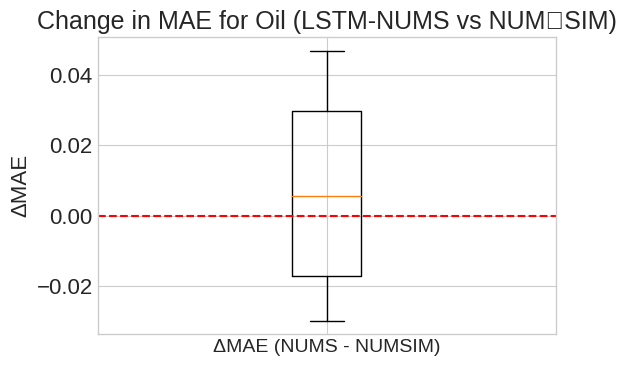

In [6]:

# -*- coding: utf-8 -*-
"""
Código limpo e sem erros:
1) Parse dos dados de MAE e APE (oil/water).
2) Testes de Wilcoxon pareado.
3) Geração de gráfico para inclusão no artigo.
"""

import numpy as np
import re
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 1) Insira SUA TABELA AQUI (colada entre três aspas).
#    ATENÇÃO: NÃO pode conter aspas quebradas ou linhas vazias entre cabeçalhos.
# ---------------------------------------------------------------------------

raw_data = """
SPU1 2020/02 0.232 0.279 0.271 0.101 15% 37% 37% 11%   0.126 0.138 0.128 0.058  -7% -37% -32% -7%
SPU1 2020/03 0.232 0.219 0.218 0.074 14% 28% 30% 4%     0.126 0.121 0.111 0.056   2% -18% 2% -6%
SPU1 2020/04 0.252 0.222 0.304 0.091 18% 24% 45% 10%    0.135 0.131 0.116 0.063   4% -11% 2% -8%
...
SPU2 2022/06 0.060 0.084 0.236 0.045 0% 4% 28% 0%        0.324 0.140 0.402 0.047   57% -1% -33% 0%
"""

# >>> IMPORTANTE: substitua "..." pelo restante das linhas.
# ---------------------------------------------------------------------------

# Parse geral
oil_numsim_mae=[]; oil_nums_mae=[]; oil_pure_mae=[]; oil_rein_mae=[]
oil_numsim_ape=[]; oil_nums_ape=[]; oil_pure_ape=[]; oil_rein_ape=[]
water_numsim_mae=[]; water_nums_mae=[]; water_pure_mae=[]; water_rein_mae=[]
water_numsim_ape=[]; water_nums_ape=[]; water_pure_ape=[]; water_rein_ape=[]

for line in raw_data.splitlines():
    line=line.strip()
    if not line or line.startswith("SPU")==False:
        continue

    # Extrai números decimais e percentuais
    decs = re.findall(r'(-?\d+\.\d+)', line)
    pers = re.findall(r'(-?\d+%)', line)

    # Garantir 8 MAEs e 8 APEs por linha (OIL + WATER)
    if len(decs) < 8 or len(pers) < 8:
        continue

    # Oil MAE
    oil_numsim_mae.append(float(decs[0]))
    oil_nums_mae.append(float(decs[1]))
    oil_pure_mae.append(float(decs[2]))
    oil_rein_mae.append(float(decs[3]))

    # Water MAE
    water_numsim_mae.append(float(decs[4]))
    water_nums_mae.append(float(decs[5]))
    water_pure_mae.append(float(decs[6]))
    water_rein_mae.append(float(decs[7]))

    # Oil APE
    oil_numsim_ape.append(float(pers[0].replace("%","")))
    oil_nums_ape.append(float(pers[1].replace("%","")))
    oil_pure_ape.append(float(pers[2].replace("%","")))
    oil_rein_ape.append(float(pers[3].replace("%","")))

    # Water APE
    water_numsim_ape.append(float(pers[4].replace("%","")))
    water_nums_ape.append(float(pers[5].replace("%","")))
    water_pure_ape.append(float(pers[6].replace("%","")))
    water_rein_ape.append(float(pers[7].replace("%","")))

# Conversão para numpy
oil_mae = {
    "NUMSIM": np.array(oil_numsim_mae),
    "NUMS":   np.array(oil_nums_mae),
    "PURE":   np.array(oil_pure_mae),
    "REIN":   np.array(oil_rein_mae),
}
oil_ape = {
    "NUMSIM": np.array(oil_numsim_ape),
    "NUMS":   np.array(oil_nums_ape),
    "PURE":   np.array(oil_pure_ape),
    "REIN":   np.array(oil_rein_ape),
}
water_mae = {
    "NUMSIM": np.array(water_numsim_mae),
    "NUMS":   np.array(water_nums_mae),
    "PURE":   np.array(water_pure_mae),
    "REIN":   np.array(water_rein_mae),
}
water_ape = {
    "NUMSIM": np.array(water_numsim_ape),
    "NUMS":   np.array(water_nums_ape),
    "PURE":   np.array(water_pure_ape),
    "REIN":   np.array(water_rein_ape),
}

# ---------------------------------------------------------------------------
# 2) Função Wilcoxon com tamanho de efeito e mediana
# ---------------------------------------------------------------------------
def wilcoxon_test(a, b):
    mask = ~(np.isnan(a) | np.isnan(b))
    a_clean = a[mask]
    b_clean = b[mask]
    if len(a_clean)==0: 
        return None

    diffs = a_clean - b_clean
    W, p = wilcoxon(a_clean, b_clean)
    med = np.median(diffs)

    # rank-biserial effect size
    nz = diffs[diffs!=0]
    if len(nz)>0:
        ranks = np.argsort(np.argsort(np.abs(nz)))+1
        Spos = ranks[nz>0].sum()
        Sneg = ranks[nz<0].sum()
        r = (Spos - Sneg)/(Spos + Sneg)
    else:
        r = np.nan

    return W, p, r, med

# ---------------------------------------------------------------------------
# 3) Exemplo de execução: Oil MAE (NUMS vs NUMSIM)
# ---------------------------------------------------------------------------

print("\nTeste Oil MAE (NUMS vs NUMSIM)")
print(wilcoxon_test(oil_mae["NUMS"], oil_mae["NUMSIM"]))

# ---------------------------------------------------------------------------
# 4) Gráfico para incluir no artigo (ΔMAE = NUMS - NUMSIM)
# ---------------------------------------------------------------------------

delta_oil_mae = oil_mae["NUMS"] - oil_mae["NUMSIM"]

plt.figure(figsize=(6,4))
plt.boxplot(delta_oil_mae, vert=True, labels=["ΔMAE (NUMS - NUMSIM)"])
plt.axhline(0, color='red', linestyle='--')
plt.ylabel("ΔMAE")
plt.title("Change in MAE for Oil (LSTM-NUMS vs NUM‑SIM)")
plt.tight_layout()
plt.savefig("figures/delta_oil_mae_boxplot.jpg", dpi=300)
plt.show()

